# Supervised Feature Selection Guide

In [45]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## 1. Filter

Select subsets of features according to their relationship with the target variable. It is based on a statistics approach.

![Drag Racing](images/feng_process.png)

### 1.1 Categorical Input: Chi-Squared

Statistical test to see the independence of 2 categorical variables, the variables that are independent of the target variable would be the candidates to be eliminated.

In [7]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [12]:
cat_data = pd.read_csv('data/categorical_input.csv', header=None)
cat_data.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [29]:
pd.DataFrame(data={'missings':cat_data.isnull().sum(), 
                   'percent_missing': cat_data.isnull().sum() / len(cat_data)}, 
             index=cat_data.columns)

,missings,percent_missing
0,0,0.0
1,0,0.0
2,0,0.0
3,0,0.0
4,0,0.0
5,0,0.0
6,0,0.0
7,0,0.0
8,0,0.0
9,0,0.0


In [28]:
for i in cat_data.columns:
    cat_data[i] = cat_data[i].fillna(cat_data[i].mode()[0])

In [30]:
data = cat_data.values
X = data[:, :-1]
y = data[:,-1]

In [31]:
# Encode categories based on appearance
oe = OrdinalEncoder()
X = oe.fit_transform(X)

# Encode target for binary clasiffication
le = LabelEncoder()
y = le.fit_transform(y)

Feature 0: 0.563284
Feature 1: 0.712378
Feature 2: 5.534357
Feature 3: 84.840985
Feature 4: 17.621176
Feature 5: 13.272755
Feature 6: 0.522775
Feature 7: 0.425232
Feature 8: 8.197246


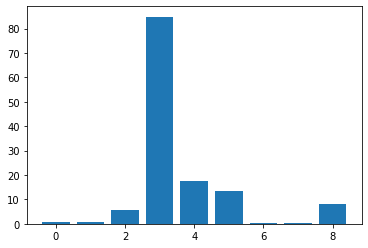

In [32]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X, y)
X_fs = fs.transform(X)

# The greater the scores are the better, because more dependant are from each other
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### 1.2 Categorical Input: Mutual Information

It measures the mutual dependence of two variables, that is, it measures the reduction of the uncertainty (entropy) of a random variable, X, due to the knowledge of the value of another random variable Y. For example, if X and Y are independent, then knowing X does not give information about Y and vice versa, so their mutual information is zero.

Feature 0: 0.068533
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.074196
Feature 4: 0.054834
Feature 5: 0.117169
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.000000


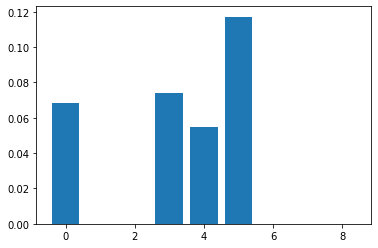

In [36]:
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import mutual_info_classif

cat_data = pd.read_csv('data/categorical_input.csv', header=None)

for i in cat_data.columns:
    cat_data[i] = cat_data[i].fillna(cat_data[i].mode()[0])

data = cat_data.values
X = data[:, :-1]
y = data[:,-1]

# Encode categories based on appearance
oe = OrdinalEncoder()
X = oe.fit_transform(X)

# Encode target for binary classification
le = LabelEncoder()
y = le.fit_transform(y)

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X, y)
X_fs = fs.transform(X)

# The greater the scores are the better, because more dependant are from each other
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### 1.3 Numerical Input: ANOVA

ANOVA: means analysis of variance. It is a statistical technique that indicates whether two variables (one independent and one dependent) are related based on whether the means of the dependent variable are different in the categories or groups of the independent variable. In other words, it indicates whether the means between two or more groups are similar or different.

In [39]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [40]:
num_data = pd.read_csv('data/numerical_input.csv', header=None)
num_data.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Feature 0: 1.468332
Feature 1: 0.784878
Feature 2: 4.925982
Feature 3: 26.489526
Feature 4: 23.563620
Feature 5: 27.964633
Feature 6: 0.980135
Feature 7: 0.638976
Feature 8: 11.096221


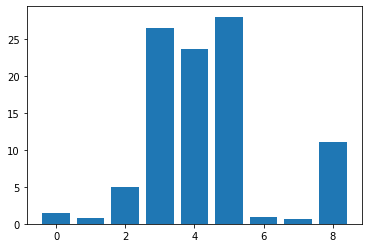

In [41]:
data = num_data.values
X = data[:, :-1]
y = data[:,-1]

le = LabelEncoder()
y = le.fit_transform(y)

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)
X_fs = fs.transform(X)

# The greater the scores are the better, because more dependant are from each other
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### 1.4 Pearson's Correlation

Correlation is a measure of how two variables change together. Perhaps the most common is the Pearson correlation which assumes a Gaussian distribution for each variable. 

Feature 0: 39.670227
Feature 1: 213.161752
Feature 2: 3.256950
Feature 3: 4.304381
Feature 4: 13.281108
Feature 5: 71.772072
Feature 6: 23.871300
Feature 7: 46.140611


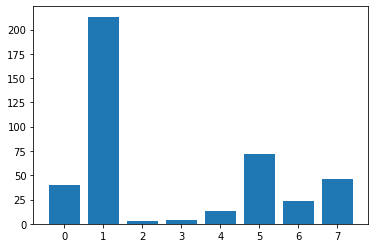

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

data = num_data.values
X = data[:, :-1]
y = data[:,-1]

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)
X_fs = fs.transform(X)

# The greater the scores are the better, because more dependant are from each other
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

## 2. Wrapper

Select subsets of features based on their predictive power.

### 2.1 Recursive Feature Elimination (RFE)

RFE is popular because it is easy to set up and use and because it is effective in selecting those features in a training data set that are most relevant to predicting the target variable.

There are two important configuration options when using RFE: 
- the choice of the number of features to select
- the choice of the algorithm used to help choose the features. 

Both of these hyperparameters can be explored, although the performance of the method does not depend greatly on these hyperparameters being set correctly.

In [73]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# define dataset
X, y = make_classification(n_samples=1000, n_features=10, random_state=1)

# summarize the dataset
print(X.shape, y.shape)

#rfe = RFECV(estimator=DecisionTreeRegressor()) # We can select n_features automatically
#rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe.fit(X, y)
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))
    
# We can use any other model such as DecisionTreeClassifier, RandomForestClassifier
model = LogisticRegression()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])

# evaluate model
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

(1000, 10) (1000,)
Column: 0, Selected=True, Rank: 1
Column: 1, Selected=False, Rank: 6
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=True, Rank: 1
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=False, Rank: 4
Column: 7, Selected=False, Rank: 2
Column: 8, Selected=False, Rank: 5
Column: 9, Selected=False, Rank: 3
Accuracy: 0.851 (0.024)


## 3. Intrinsinc

Algorithms perform automatic feature selection during training.

Feature importance is the technique that assigns a score to each input depending on how useful it is in predicting a target variable

### 3.1 Regression

Feature: 0, Score: 0.00252
Feature: 1, Score: 0.00436
Feature: 2, Score: 0.00236
Feature: 3, Score: 0.00120
Feature: 4, Score: 0.51660
Feature: 5, Score: 0.43811
Feature: 6, Score: 0.02780
Feature: 7, Score: 0.00321
Feature: 8, Score: 0.00273
Feature: 9, Score: 0.00111


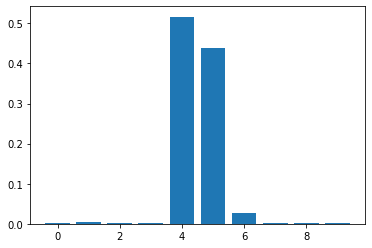

In [77]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)

#model = LinearRegression()
model = DecisionTreeRegressor()

# fit the model
model.fit(X, y)

#importance = model.coef_
importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

plt.bar([x for x in range(len(importance))], importance)
plt.show()

### 3.2 Classification

Feature: 0, Score: 0.16320
Feature: 1, Score: -0.64301
Feature: 2, Score: 0.48497
Feature: 3, Score: -0.46190
Feature: 4, Score: 0.18432
Feature: 5, Score: -0.11978
Feature: 6, Score: -0.40602
Feature: 7, Score: 0.03772
Feature: 8, Score: -0.51785
Feature: 9, Score: 0.26540


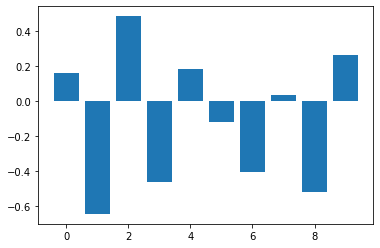

In [81]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

#model = LogisticRegression()
model = LogisticRegression()
model.fit(X, y)

importance = model.coef_[0]
#importance = model.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# This is a classification problem with classes 0 and 1.
# Positive scores indicate a characteristic that predicts class 1.
# Negative scores indicate a characteristic that predicts class 0.
plt.bar([x for x in range(len(importance))], importance)
plt.show()